In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import re 
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_excel (r'/content/drive/MyDrive/Internship/Project 4 - Simulating Subjective Judgment Aggregation/TlabWinter2021/yusuke_2021_spacialexperience_runme_raw_21_06_22.xlsx')
#print (df)

In [ ]:
df = pd.DataFrame(df, columns= ['values.img_file', 'response'])
#print(df)

In [ ]:
totalRows = df.shape[0]
print(totalRows)

735


##Creat columns and sort the data

In [ ]:
def extract(df):
  shape = pd.DataFrame(df, columns= ['values.img_file'])
  response = pd.DataFrame(df, columns= ['response'])

  # extract "Did you see each dots"
  temp = response.iloc[1:80:4]
  DidYouSeeEachDots = []
  for ind in temp.index:
    DidYouSeeEachDots.append(temp['response'][ind])

  # extract dots_actual
  temp = shape.iloc[0:80:4]
  dots_actual = []
  for ind in temp.index:
    dots_actual.append([int(num) for num in re.findall(r"\d+",  shape['values.img_file'][ind])])

  # extract dots_predict
  temp = response.iloc[2:80:4]
  dots_predict = []
  for ind in temp.index:
    dots_predict.append(temp['response'][ind])

  # extract shape_actual
  # you will have to extract manually later
  temp = shape.iloc[3:80:4]
  shape_actual = []
  for ind in temp.index:
    # extract string 
    shape_actual.append(temp['values.img_file'][ind])

  # extract shape_predict
  temp = response.iloc[3:80:4]
  shape_predict = []
  for ind in temp.index:
    # add DeepLearning
    shape_predict.append(temp['response'][ind])

  # extract general info
  general_info = response.iloc[80:86]

  return DidYouSeeEachDots, dots_actual, dots_predict, shape_actual, shape_predict, general_info

##Plot dots

In [ ]:
def plotDots(DidYouSeeEachDots, dots_actual, dots_predict, index):
  x1 = []
  y1 = []
  x2 = []
  y2 = []
  for i in range(len(DidYouSeeEachDots)):
    if DidYouSeeEachDots[i] == "Yes":
      x1.append(dots_actual[i])
      y1.append(dots_predict[i])
    elif DidYouSeeEachDots[i] == "No":
      x2.append(dots_actual[i])
      y2.append(dots_predict[i])

  plt.style.use('seaborn-whitegrid')
  #plt.axis([0, 300, 0, 300]) # sets the boundary of the plot 
  plt.plot(x1, y1, 'o', color='r', label = 'SawEachDots')
  plt.plot(x2, y2, 'o', color='b', label = 'DidNotSeeEachDots')
  plt.plot([0, 300], [0, 300], '--', color = 'k', label = 'y = x as reference line')
  plt.title("subject" + str(index))
  plt.ylabel("Predicted number of dots")
  plt.xlabel("Actual number of dots")
  #plt.xscale("log", basex=2)
  #plt.yscale("log", basey=2)

##Plot Regression line of dots

In [ ]:
def plotLine(dots_actual, dots_predict, index):
  x = []
  y = []
  
  for i in range(len(dots_actual)):
    x.append(dots_actual[i])
    y.append(dots_predict[i])

  #reshape matrix, make the array 1D
  x = np.array(x)
  x = x.flatten()
  y = np.array(y)
  y = y.flatten()
  #calculate regression
  m, b = np.polyfit(x, y, 1)

  plt.style.use('seaborn-whitegrid')
  plt.axis([0, 300, 0, 300]) # sets the boundary of the plot 
  plt.plot(x, y, 'o', color='b')
  plt.plot(x, m*x + b , color='g', label= "m = " + str(m) + ", b = " + str(b))
  plt.plot([0, 300], [0, 300], '--', color = 'k', label = 'y = x as reference line')
  plt.title("subject" + str(index))
  plt.ylabel("Predicted number of dots")
  plt.xlabel("Actual number of dots")
  #plt.xscale("log", basex=2)
  #plt.yscale("log", basey=2)

##Plot Confusion matrix

In [ ]:
def confusionMatrix(shape_predict, shape_actual):
  #confusinon matrix
  from sklearn.metrics import confusion_matrix
  #shape_actual = [2, 0, 1, 2, 1, 1]
  #shape_predict = [0, 0, 2, 2, 1, 1]
  #confusion_matrix(shape_predict, shape_actual, labels=["Line", "Triangle", "Circle", "dots", "BlankScreen", "NoResponse"])
  x = confusion_matrix(shape_predict, shape_actual)
  #heatmap
  plt.imshow(x, cmap='hot', interpolation='nearest')
  plt.colorbar()
  plt.show()

#Main Script 

##each participants

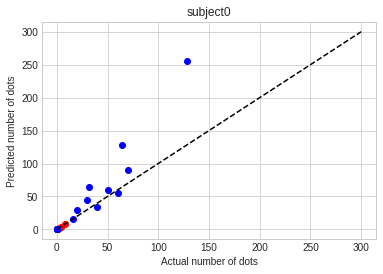

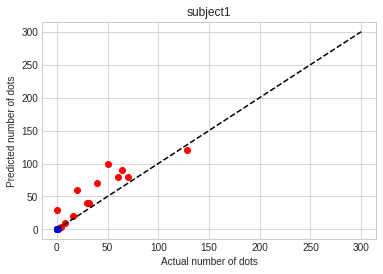

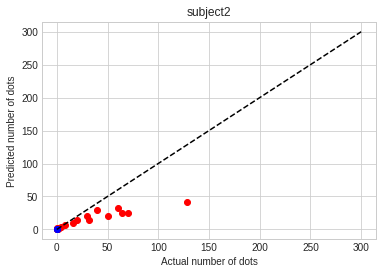

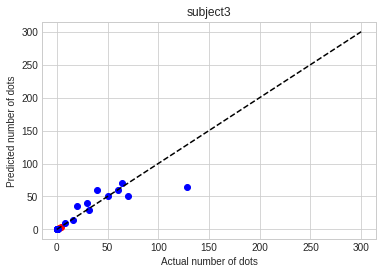

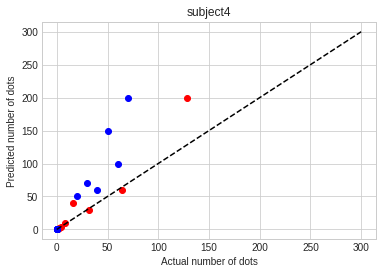

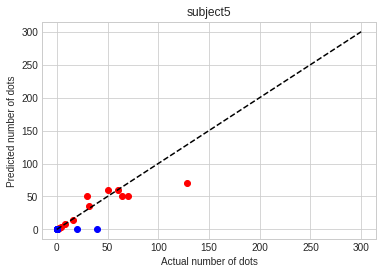

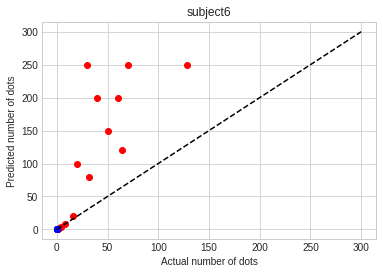

In [ ]:
#write to new excel sheet
#writer = pd.ExcelWriter('/content/drive/MyDrive/Internship/TlabWinter2021/Participants.xlsx')
#with pd.ExcelWriter('/content/drive/MyDrive/Internship/Project 4 - Simulating Subjective Judgment Aggregation/TlabWinter2021/Participants.xlsx') as writer: 

df_list = list()
for i in range(int(totalRows/105 )):
  temp = df.iloc[105*i+17:105*i+105] 
  df_list.append(temp)
  #df_list[i].to_excel(writer, sheet_name= 'Participant' + str(i+1))
  
  DidYouSeeEachDots, dots_actual, dots_predict, shape_actual, shape_predict, general_info = extract(df_list[i])
  plt.figure(i)
  plotDots(DidYouSeeEachDots ,dots_actual, dots_predict, i)
#writer.save

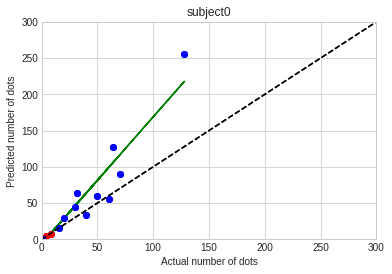

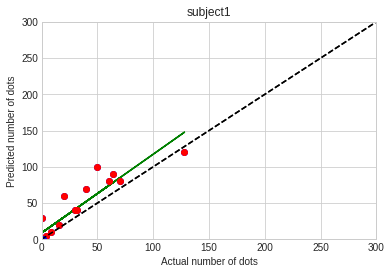

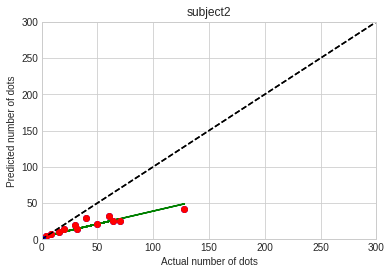

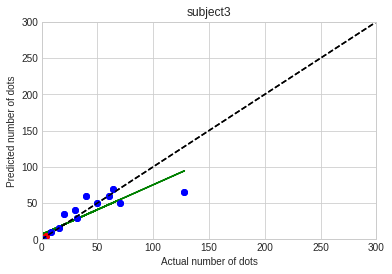

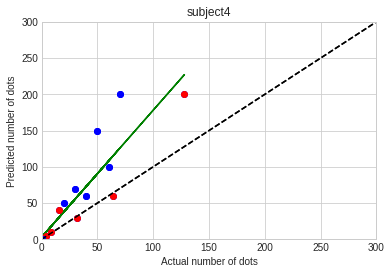

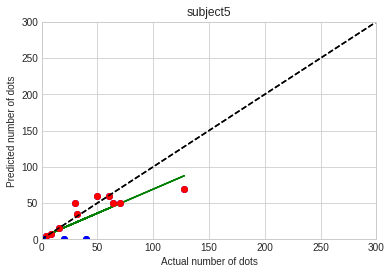

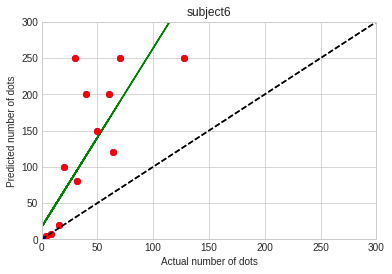

In [ ]:
#write to new excel sheet
#writer = pd.ExcelWriter('/content/drive/MyDrive/Internship/TlabWinter2021/Participants.xlsx')
#with pd.ExcelWriter('/content/drive/MyDrive/Internship/Project 4 - Simulating Subjective Judgment Aggregation/TlabWinter2021/Participants.xlsx') as writer: 

df_list = list()
for i in range(int(totalRows/105 )):
  temp = df.iloc[105*i+17:105*i+105] 
  df_list.append(temp)
  #df_list[i].to_excel(writer, sheet_name= 'Participant' + str(i+1))
  
  DidYouSeeEachDots, dots_actual, dots_predict, shape_actual, shape_predict, general_info = extract(df_list[i])
  plt.figure(i)
  plotLine(dots_actual, dots_predict, i)
  plotDots(DidYouSeeEachDots ,dots_actual, dots_predict, i)
#writer.save

##All participants

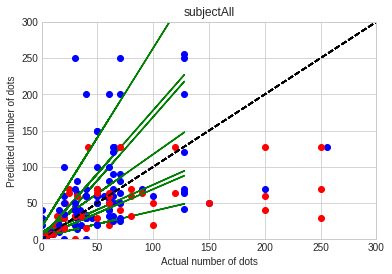

In [ ]:
df_list = list()
for i in range(int(totalRows/105 )):
  temp = df.iloc[105*i+17:105*i+105] 
  df_list.append(temp)
  #df_list[i].to_excel(writer, sheet_name= 'Participant' + str(i+1))
  
  DidYouSeeEachDots, dots_actual, dots_predict, shape_actual, shape_predict, general_info = extract(df_list[i])
  plotLine(dots_actual, dots_predict, i)
  plotDots(DidYouSeeEachDots ,dots_predict, dots_actual, "All")


In [ ]:
#Naive Bayes algorithm

# create another colab note to create a training data

#Text correction method
https://bhashkarkunal.medium.com/spelling-correction-using-deep-learning-how-bi-directional-lstm-with-attention-flow-works-in-366fabcc7a2f

#Naive Bayes algorithm
https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a


SyntaxError: ignored